In [2]:
import torch
import torchvision
import sys
import os 

import numpy as np
import uuid
import cv2
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor


In [3]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [5]:
sam_checkpoint = "./models/sam/sam_vit_b_01ec64.pth"
model_type = "vit_b"
device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
mask_generator = SamAutomaticMaskGenerator(sam)

In [18]:
import json

with open("config.json") as json_config_file:
    config_file = json.load(json_config_file)

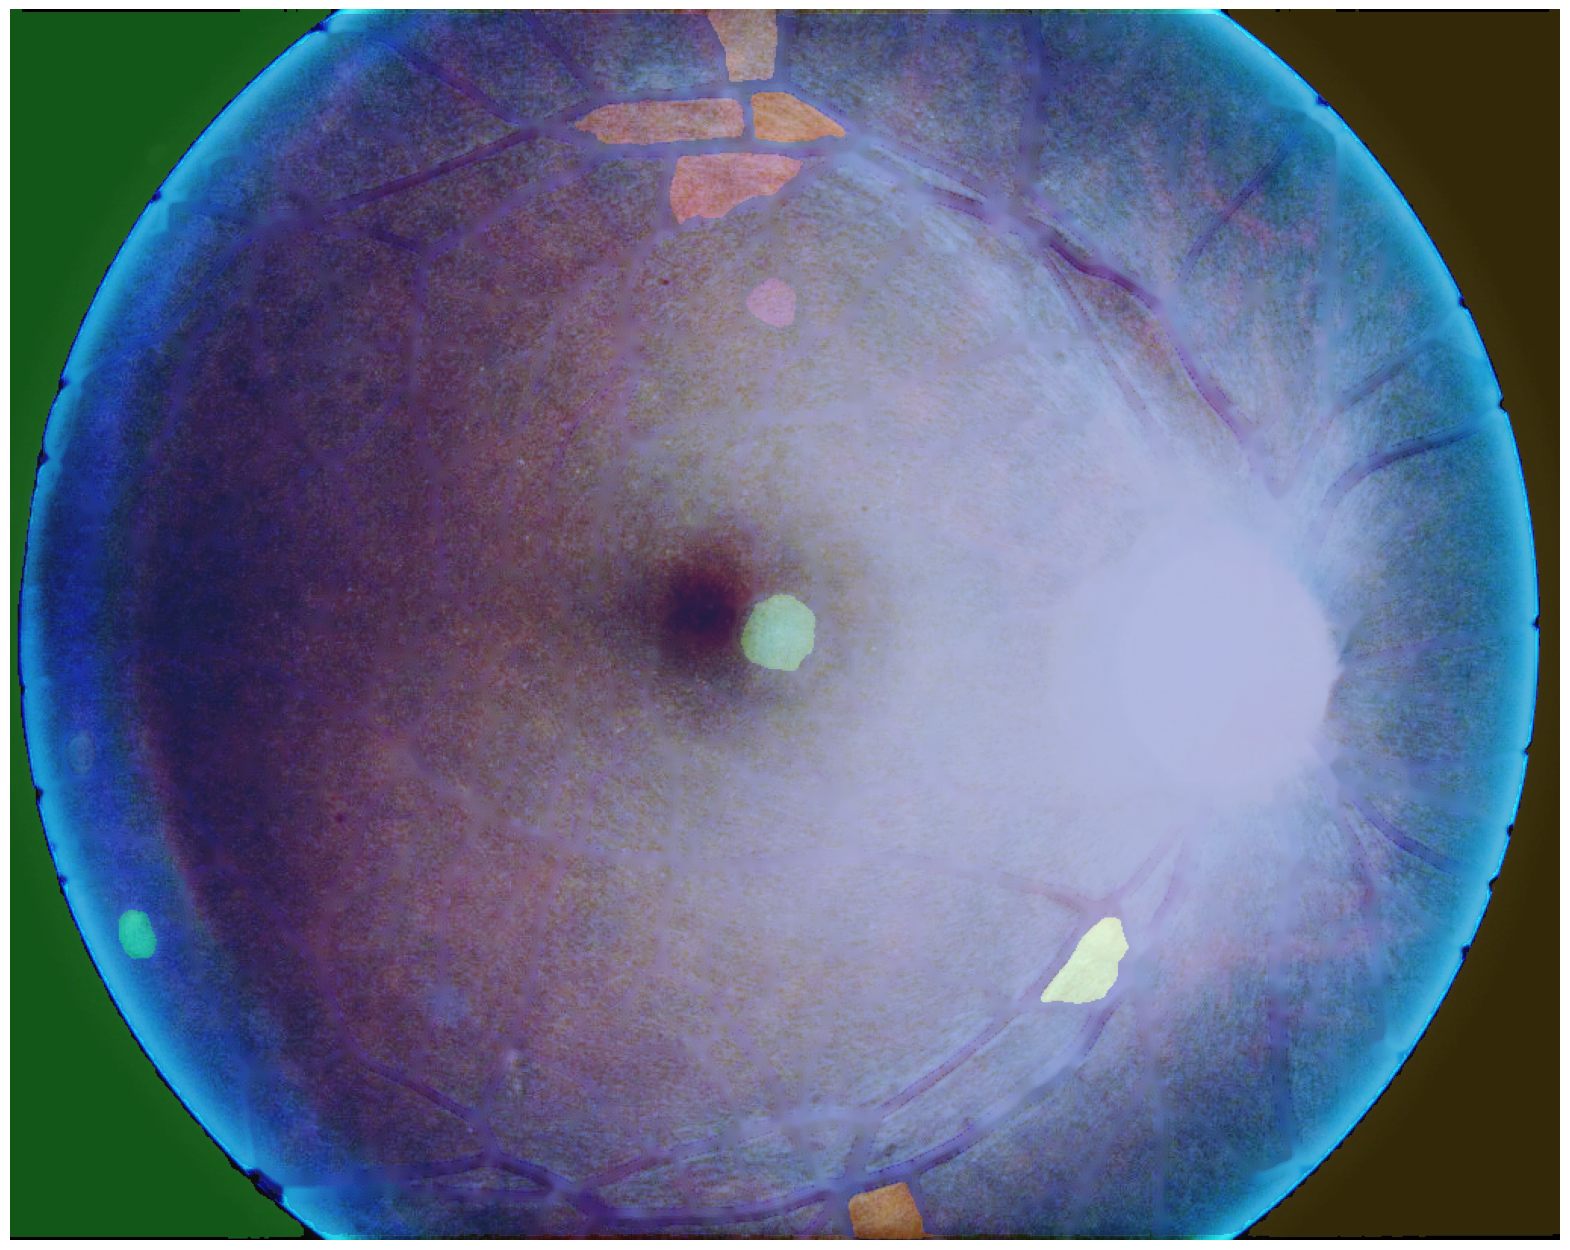

In [21]:
image_src = cv2.imread("./output/clahe/40_left.png")
img= cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
mask = mask_generator.generate(img)

plt.figure(figsize=(20,20))
plt.imshow(img)
show_anns(mask)
plt.axis('off')
plt.show()


#output_path = config_file["sam"]["output"]
#os.makedirs(f"{output_path}", exist_ok=True)
#print(output_path)
#cv2.imwrite(f"{output_path}/40_left.png", cv2.cvtColor(mask, cv2.COLOR_RGB2BGR))
